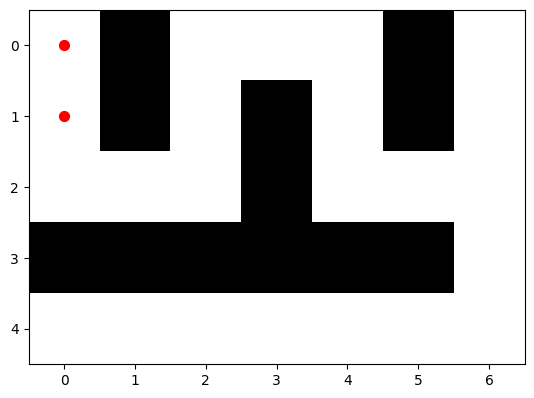

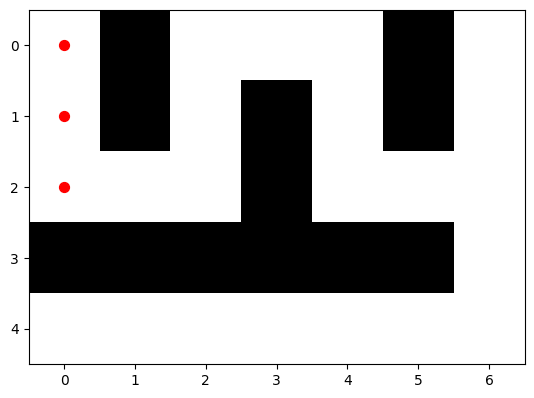

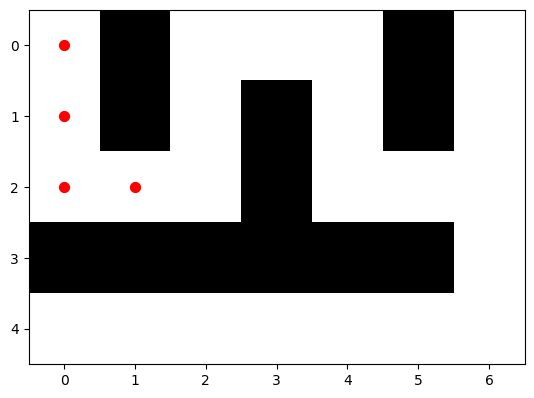

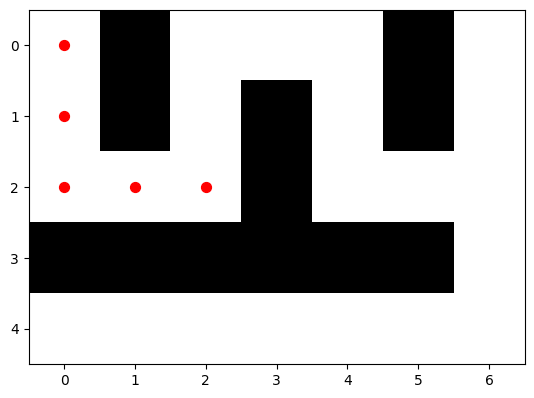

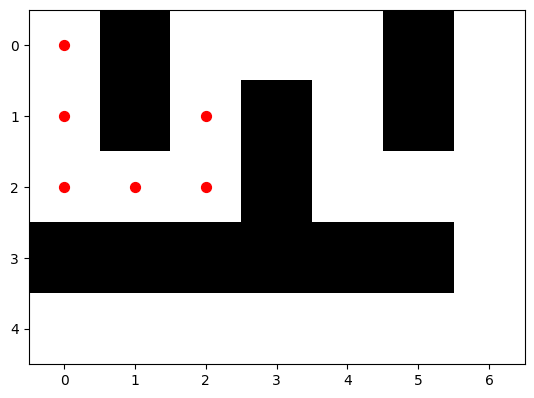

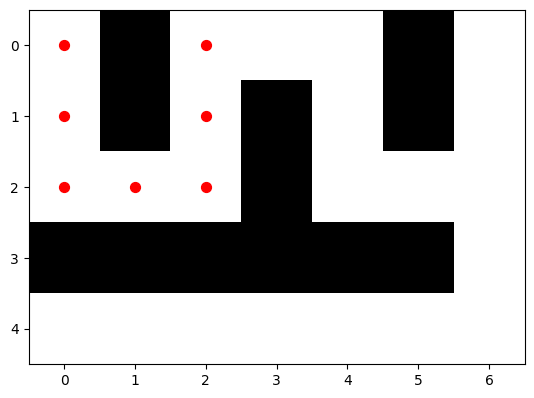

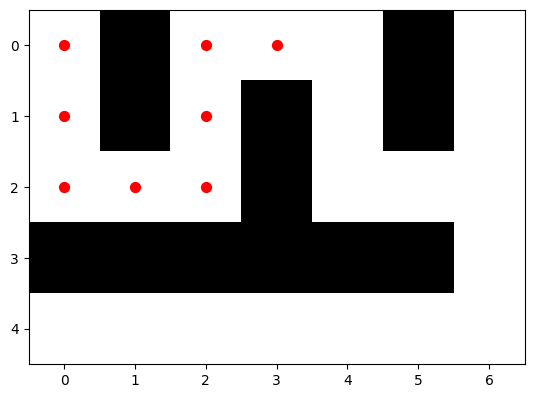

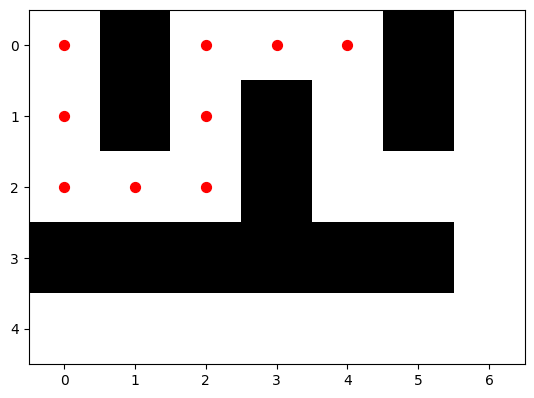

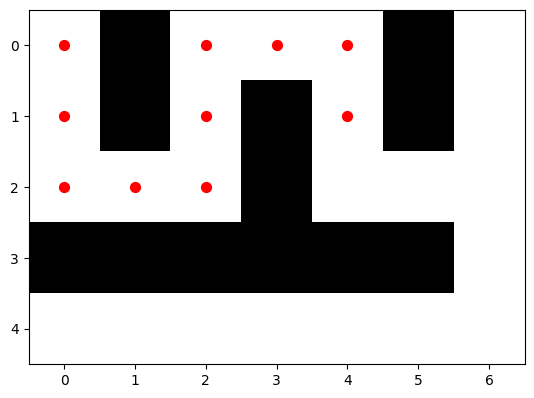

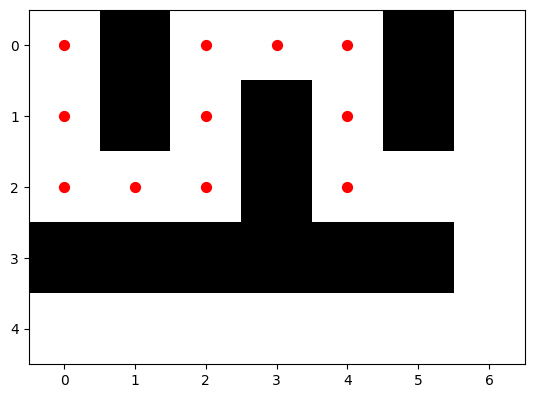

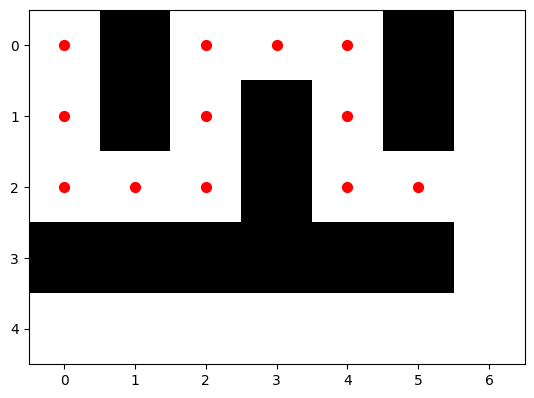

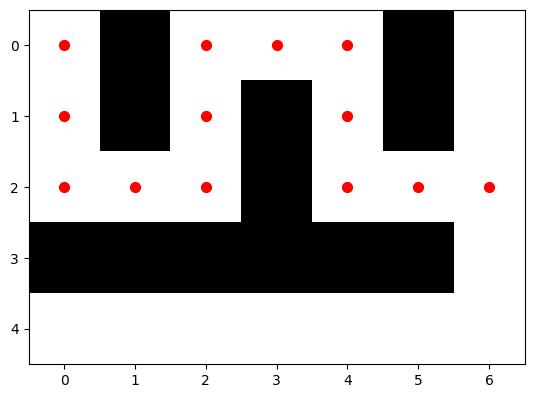

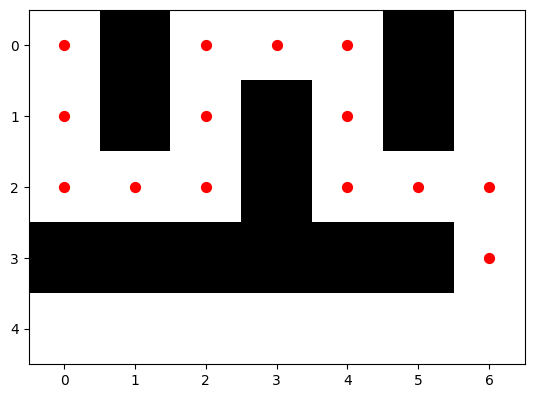

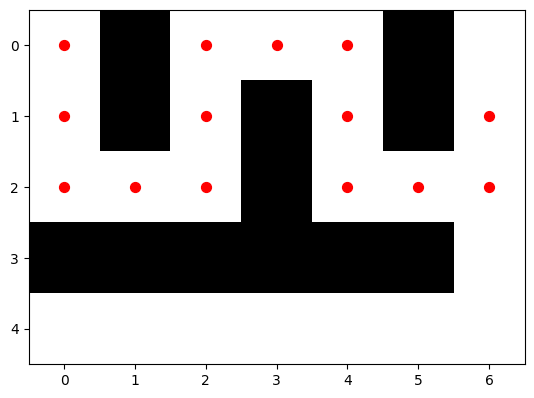

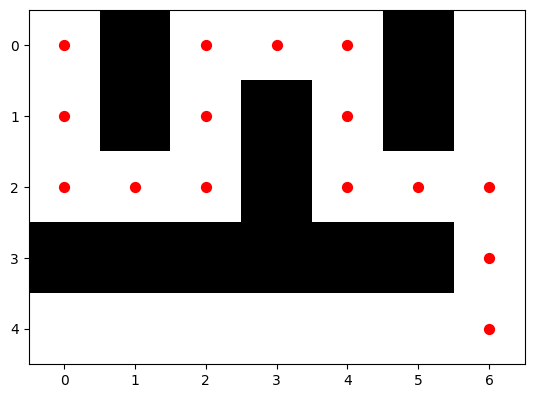

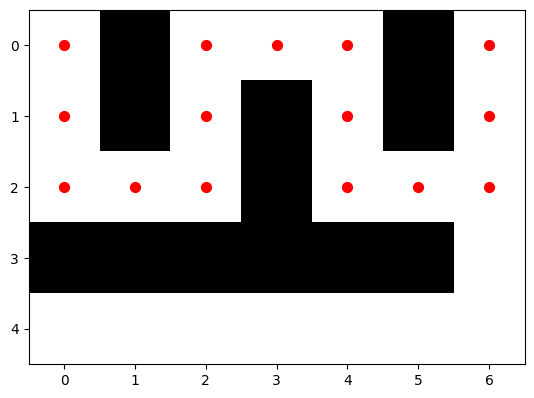

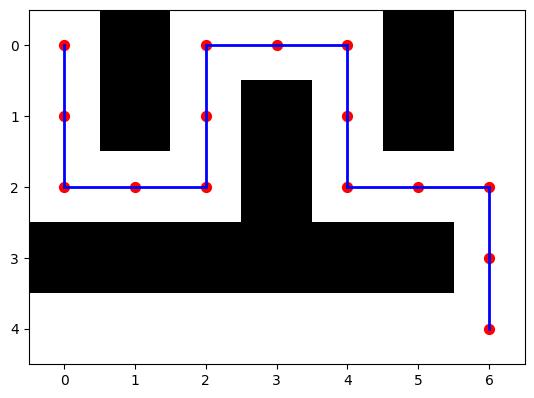

Ruta encontrada: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6)]


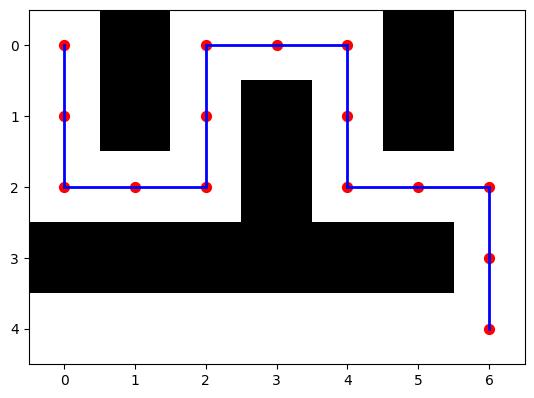

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import time

def bfs_maze(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    queue = deque([(start, [start])])  # Cola para BFS: (posición actual, camino recorrido)
    visited = set()
    visited.add(start)
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Derecha, Abajo, Izquierda, Arriba
    
    while queue:
        (x, y), path = queue.popleft()
        
        if (x, y) == end:
            visualize_maze(maze, path, final=True)
            return path  # Retorna el camino más corto encontrado
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0 and (nx, ny) not in visited:
                queue.append(((nx, ny), path + [(nx, ny)]))
                visited.add((nx, ny))
                
                visualize_maze(maze, path + [(nx, ny)])
                time.sleep(0.1)
    
    return None  # No se encontró ruta

def visualize_maze(maze, path=[], final=False):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap='gray_r')
    
    for (x, y) in path:
        plt.scatter(y, x, color='red', s=50)
    
    if final:
        for i in range(len(path) - 1):
            x1, y1 = path[i]
            x2, y2 = path[i + 1]
            plt.plot([y1, y2], [x1, x2], color='blue', linewidth=2)
    
    plt.pause(0.1)
    plt.clf()

if __name__ == "__main__":
    maze = [
        [0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]
    start = (0, 0)  # Punto de inicio
    end = (4, 6)  # Punto de destino
    
    plt.figure()
    path = bfs_maze(maze, start, end)
    
    if path:
        print("Ruta encontrada:", path)
        visualize_maze(maze, path, final=True)
        plt.show()
    else:
        print("No se encontró una ruta")
